SuperStore Company is a global retail company - Global. So the company has a lot of customers.
On the occasion of Christmas and New Year, the Marketing Department wants to run marketing campaigns to thank customers for supporting the company during the past time. As well as exploit potential customers to become loyal customers.
The company needs to classify the segments of each customer to deploy each marketing program suitable for each customer group using the RFM model.

Analysis structure:
1. Prepare

2. Data Validation

3. Business Situation

    3.1. Quantity and Profit
    
    3.2 Customer segmentation by RFM

# 1. Prepare

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
orders_df = pd.read_excel('Dataset.xlsx', sheet_name='Orders')
returned_df = pd.read_excel('Dataset.xlsx', sheet_name='Return')
product_df = pd.read_excel('Dataset.xlsx', sheet_name='Product')
segmentation = pd.read_excel('Dataset.xlsx', sheet_name='Segmentation')

# 2. Data Validation

In [4]:
orders_df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     646  CA-2017-126221 2017-12-30 2018-01-05  Standard Class    CC-12430   
1     907  CA-2017-143259 2017-12-30 2018-01-03  Standard Class    PO-18865   
2     908  CA-2017-143259 2017-12-30 2018-01-03  Standard Class    PO-18865   
3     909  CA-2017-143259 2017-12-30 2018-01-03  Standard Class    PO-18865   
4    1297  CA-2017-115427 2017-12-30 2018-01-03  Standard Class    EB-13975   

       Channel  Postal Code       Product ID  Sales  Quantity  Unit Cost  
0  Home Office        47201  OFF-AP-10002457 209.30         2      76.39  
1     Consumer        10009  FUR-BO-10003441 323.14         4      77.75  
2     Consumer        10009  TEC-PH-10004774  90.93         7      12.60  
3     Consumer        10009  OFF-BI-10003684  52.78         3      10.99  
4    Corporate        94533  OFF-BI-10002103  13.90         2       4.69

In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [6]:
orders_df[orders_df[['Order ID', 'Product ID']].duplicated()]

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
388     7883  CA-2017-118017 2017-12-03 2017-12-06    Second Class   
790     3185  CA-2017-152912 2017-11-09 2017-11-12    Second Class   
3387    1302  CA-2016-137043 2016-12-23 2016-12-25    Second Class   
4576     353  CA-2016-129714 2016-09-01 2016-09-03     First Class   
5473     432  US-2016-123750 2016-04-15 2016-04-21  Standard Class   
5625    9170  CA-2016-140571 2016-03-15 2016-03-19  Standard Class   
7186    6501  CA-2015-103135 2015-07-24 2015-07-28  Standard Class   
9607    3407  US-2014-150119 2014-04-23 2014-04-27  Standard Class   

     Customer ID      Channel  Postal Code       Product ID  Sales  Quantity  \
388     LC-16870     Consumer        80229  TEC-AC-10002006 102.34         8   
790     BM-11650    Corporate        21044  OFF-ST-10003208 544.38         3   
3387    LC-17140     Consumer        22153  FUR-FU-10003664 286.38         3   
4576    AB-10060  Home Office        10009  OFF-PA-10001970  49.12         4   
5473    RB-19795  Home Office        28052  TEC-AC-10004659 291.96         5   
5625    SJ-20125  Home Office        39212  OFF-PA-10001954  45.68         2   
7186    SS-20515  Home Office        40214  OFF-BI-10000069  90.06         6   
9607    LB-16795  Home Office        43229  FUR-CH-10002965 281.37         2   

      Unit Cost  
388       11.03  
790      128.84  
3387      67.78  
4576       6.51  
5473      47.44  
5625      12.33  
7186       8.11  
9607     146.72

In [7]:
orders_df[(orders_df['Order ID'] == 'CA-2017-118017') & (orders_df['Product ID'] == 'TEC-AC-10002006')]

Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
387    7882  CA-2017-118017 2017-12-03 2017-12-06  Second Class    LC-16870   
388    7883  CA-2017-118017 2017-12-03 2017-12-06  Second Class    LC-16870   

      Channel  Postal Code       Product ID  Sales  Quantity  Unit Cost  
387  Consumer        80229  TEC-AC-10002006  76.75         6      11.03  
388  Consumer        80229  TEC-AC-10002006 102.34         8      11.03

In [8]:
orders_df.drop_duplicates(subset=['Order ID', 'Product ID'], keep='last', inplace=True)
orders_df.shape

(9986, 12)

In [9]:
print(returned_df.info())
returned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB
None


Returned        Order ID
0      Yes  CA-2017-153822
1      Yes  CA-2017-129707
2      Yes  CA-2014-152345
3      Yes  CA-2015-156440
4      Yes  US-2017-155999

In [10]:
returned_df.duplicated().any()

False

In [11]:
print(product_df.info())
product_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Row ID        1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB
None


Row ID       Product ID         Category Sub-Category  \
0       1  FUR-BO-10001798        Furniture    Bookcases   
1       2  FUR-CH-10000454        Furniture       Chairs   
2       3  OFF-LA-10000240  Office Supplies       Labels   
3       4  FUR-TA-10000577        Furniture       Tables   
4       5  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name  
0                  Bush Somerset Collection Bookcase  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  
2  Self-Adhesive Address Labels for Typewriters b...  
3      Bretford CR4500 Series Slim Rectangular Table  
4                     Eldon Fold 'N Roll Cart System

In [12]:
product_df[product_df['Product ID'].duplicated()]
product_df[product_df['Product ID']=='OFF-PA-10001970']

Row ID       Product ID         Category Sub-Category Product Name
315     316  OFF-PA-10001970  Office Supplies        Paper   Xerox 1881
367     368  OFF-PA-10001970  Office Supplies        Paper   Xerox 1908

In [13]:
product_df.drop_duplicates(subset=['Product ID'], keep='last', inplace=True)
product_df.shape

(1862, 5)

In [14]:
product_df[['Category','Sub-Category']].value_counts().rename('No. type of products').reset_index().sort_values(['Category','No. type of products','Sub-Category'])

Category Sub-Category  No. type of products
13        Furniture    Bookcases                    49
11        Furniture       Tables                    57
8         Furniture       Chairs                    87
3         Furniture  Furnishings                   182
15  Office Supplies     Supplies                    38
14  Office Supplies    Fasteners                    43
12  Office Supplies    Envelopes                    54
9   Office Supplies       Labels                    70
7   Office Supplies   Appliances                    98
6   Office Supplies      Storage                   131
4   Office Supplies          Art                   163
1   Office Supplies      Binders                   210
0   Office Supplies        Paper                   276
16       Technology      Copiers                    13
10       Technology     Machines                    63
5        Technology  Accessories                   144
2        Technology       Phones                   184

In [15]:
segmentation

Segment                                          RFM Score
0               Champions                  555, 554, 544, 545, 454, 455, 445
1                   Loyal             543, 444, 435, 355, 354, 345, 344, 335
2      Potential Loyalist  553, 551, 552, 541, 542, 533, 532, 531, 452, 4...
3           New Customers                  512, 511, 422, 421, 412, 411, 311
4               Promising  525, 524, 523, 522, 521, 515, 514, 513, 425,42...
5          Need Attention             535, 534, 443, 434, 343, 334, 325, 324
6          About To Sleep             331, 321, 312, 221, 213, 231, 241, 251
7                 At Risk  255, 254, 245, 244, 253, 252, 243, 242, 235, 2...
8        Cannot Lose Them               155, 154, 144, 214,215,115, 114, 113
9   Hibernating customers  332, 322, 233, 232, 223, 222, 132, 123, 122, 2...
10         Lost customers                         111, 112, 121, 131,141,151

# 3. Business Situation

In [16]:
order_return_df = orders_df.merge(returned_df, on='Order ID', how='left', indicator=True)
order_no_return = order_return_df[(order_return_df._merge=='left_only')].drop(['_merge', 'Returned'], axis=1)
order_no_return['Profit'] = order_no_return['Sales'] - order_no_return['Unit Cost']
order_no_return.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9186 entries, 0 to 9985
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9186 non-null   int64         
 1   Order ID     9186 non-null   object        
 2   Order Date   9186 non-null   datetime64[ns]
 3   Ship Date    9186 non-null   datetime64[ns]
 4   Ship Mode    9186 non-null   object        
 5   Customer ID  9186 non-null   object        
 6   Channel      9186 non-null   object        
 7   Postal Code  9186 non-null   int64         
 8   Product ID   9186 non-null   object        
 9   Sales        9186 non-null   float64       
 10  Quantity     9186 non-null   int64         
 11  Unit Cost    9186 non-null   float64       
 12  Profit       9186 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 1004.7+ KB


In [17]:
total_sales = order_no_return['Sales'].sum()
total_cost = order_no_return['Unit Cost'].sum()
total_profit = order_no_return['Profit'].sum()
print(f'Total Revenue: ${total_sales:,.2f}\nTotal Cost: ${total_cost:,.2f}\nTotal Profit: ${total_profit:,.2f}')

Total Revenue: $2,113,244.40
Total Cost: $489,229.94
Total Profit: $1,624,014.46


In [18]:
product_order_df = pd.merge(order_no_return[['Product ID','Order ID', 'Sales', 'Quantity', 'Unit Cost', 'Profit' , 'Order Date']], \
                            product_df, on='Product ID', how='left')
product_order_df.head()

Product ID        Order ID  Sales  Quantity  Unit Cost  Profit  \
0  OFF-AP-10002457  CA-2017-126221 209.30         2      76.39  132.91   
1  FUR-BO-10003441  CA-2017-143259 323.14         4      77.75  245.38   
2  TEC-PH-10004774  CA-2017-143259  90.93         7      12.60   78.33   
3  OFF-BI-10003684  CA-2017-143259  52.78         3      10.99   41.78   
4  OFF-FA-10003472  CA-2017-156720   3.02         3       1.21    1.81   

  Order Date  Row ID         Category Sub-Category  \
0 2017-12-30     554  Office Supplies   Appliances   
1 2017-12-30     719        Furniture    Bookcases   
2 2017-12-30     720       Technology       Phones   
3 2017-12-30     721  Office Supplies      Binders   
4 2017-12-30     244  Office Supplies    Fasteners   

                                        Product Name  
0  Eureka The Boss Plus 12-Amp Hard Box Upright V...  
1  Bush Westfield Collection Bookcases, Fully Ass...  
2                          Gear Head AU3700S Headset  
3               Wilson Jones Legal Size Ring Binders  
4                                Bagged Rubber Bands

## 3.1. Quantity and Profit

- Despite having the smallest quantity, Technology is the most profitable category (595,148.87) compared to other categories. In 'Technology', 'Phones' has the highest profit (302,373), is almost double that of the 2nd - 'Machines' (176,080)
- In Furniture (total profit ranked 2nd: 520,221.06). 'Chair' has the highest profit (303,013)
- Office Supplies has a profit of 508,644.53. Storage (207,531) and Binders (193,294) outperformed the third-ranked sub-category, Appliances (97,402.4).
- Total profit in all 4 years tends to increase gradually towards the end of the year, then decrease deeply at the beginning of the next year

          Category  Quantity
1  Office Supplies     21037
0        Furniture      7366
2       Technology      6362


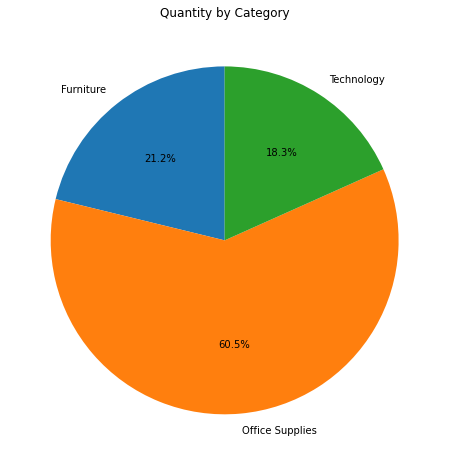

          Category     Profit
2       Technology 595,148.87
1  Office Supplies 520,221.06
0        Furniture 508,644.53


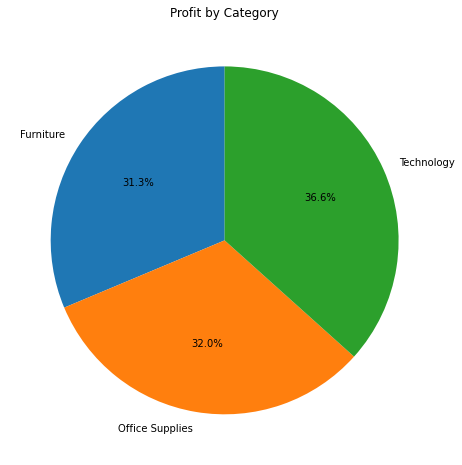

In [19]:
for i in ['Quantity', 'Profit']:
    plt.figure(figsize = (8,8))
    j = product_order_df.groupby('Category', as_index=False)[i].sum()
    print(j.sort_values(i, ascending=False))
    plt.pie(data = j, x=i, labels='Category', autopct='%.1f%%', startangle=90)
    plt.title(f'{i} by Category')
    plt.show()

In [20]:
category_quantity = product_order_df.groupby(['Category', 'Sub-Category'], as_index=False).agg({'Quantity':'sum'})
category_quantity = category_quantity.sort_values(['Quantity'], ascending=False)

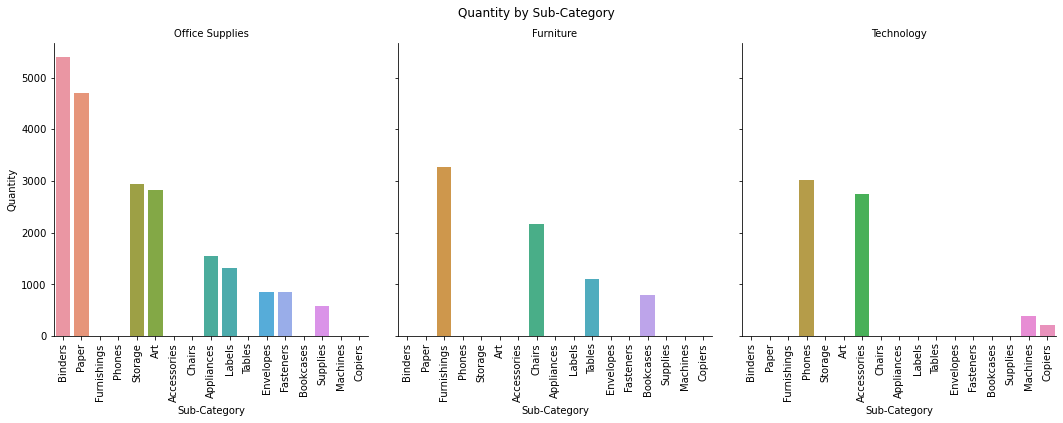

In [21]:
g=sns.catplot(data=category_quantity, x='Sub-Category', y='Quantity', kind='bar', col='Category', ci=None)
g.fig.suptitle("Quantity by Sub-Category", y=1.03)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [22]:
sale_by_subcate = product_order_df.groupby(['Category', 'Sub-Category'], as_index=False).agg(Revenue=('Sales','sum'))
sale_by_subcate = sale_by_subcate.sort_values(['Category', 'Revenue'], ascending=False)

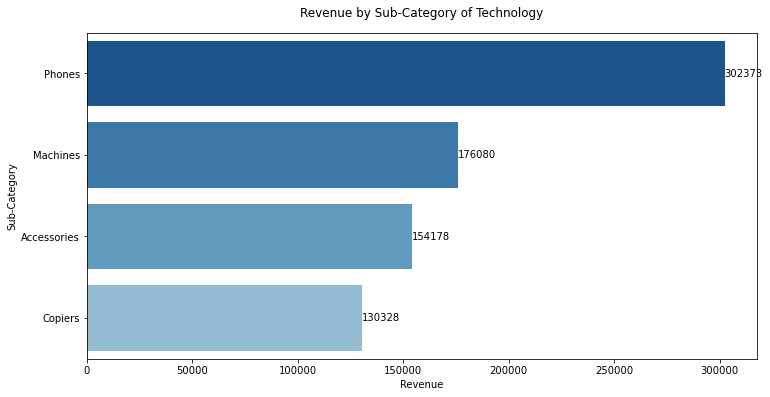

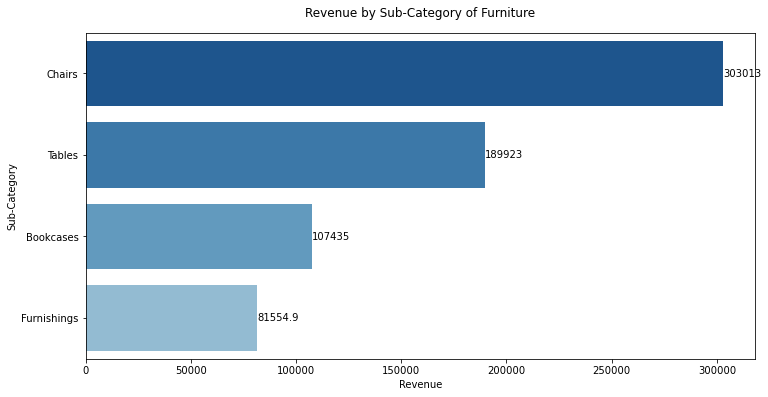

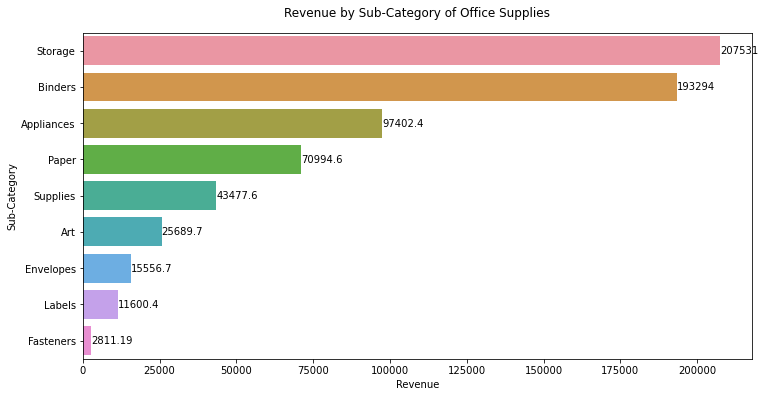

In [23]:
category=['Technology', 'Furniture', 'Office Supplies']
for i in category:
    plt.figure(figsize = (12,6))
    sns.set_palette("Blues_r")
    sc = sns.barplot(data=sale_by_subcate[sale_by_subcate['Category'] == i], y='Sub-Category', x='Revenue')
    sc.set_title(f"Revenue by Sub-Category of {i}", y=1.03)
    sc.bar_label(sc.containers[0])
    plt.show()

In [24]:
order_no_return['month_year'] = pd.to_datetime(order_return_df['Order Date']).dt.to_period('M')
order_no_return.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     646  CA-2017-126221 2017-12-30 2018-01-05  Standard Class    CC-12430   
1     907  CA-2017-143259 2017-12-30 2018-01-03  Standard Class    PO-18865   
2     908  CA-2017-143259 2017-12-30 2018-01-03  Standard Class    PO-18865   
3     909  CA-2017-143259 2017-12-30 2018-01-03  Standard Class    PO-18865   
6    5092  CA-2017-156720 2017-12-30 2018-01-03  Standard Class    JM-15580   

       Channel  Postal Code       Product ID  Sales  Quantity  Unit Cost  \
0  Home Office        47201  OFF-AP-10002457 209.30         2      76.39   
1     Consumer        10009  FUR-BO-10003441 323.14         4      77.75   
2     Consumer        10009  TEC-PH-10004774  90.93         7      12.60   
3     Consumer        10009  OFF-BI-10003684  52.78         3      10.99   
6     Consumer        80538  OFF-FA-10003472   3.02         3       1.21   

   Profit month_year  
0  132.91    2017-12  
1  245.38    2017-12  
2   78.33    2017-12  
3   41.78    2017-12  
6    1.81    2017-12

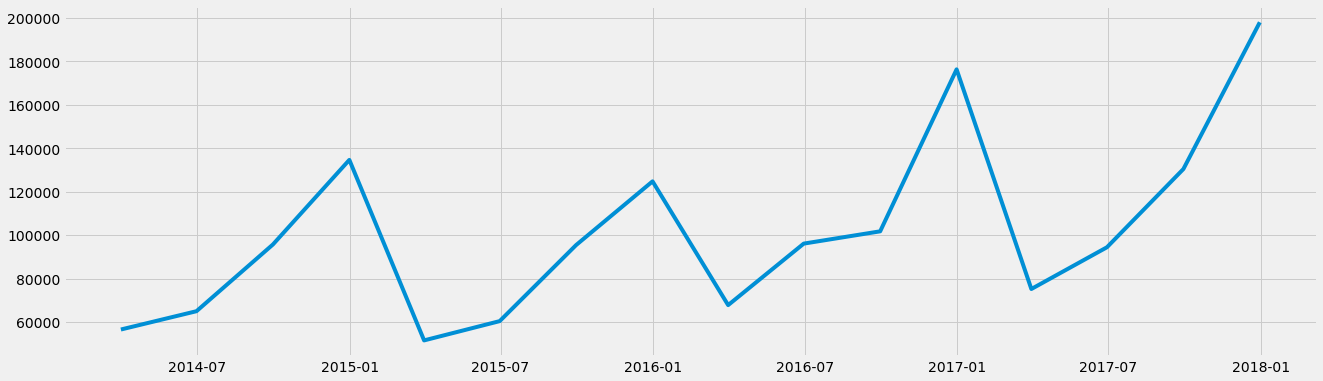

In [25]:
# month_year_grouped = order_no_return.groupby('month_year', as_index=False).\
#         agg(total_sales=('Sales', 'sum'), total_quantities=('Quantity', 'sum'))
# sns.lineplot(data=month_year_grouped, x='month_year', y='total_sales')
# plt.show()
# month_year_grouped
monthly_sales = order_no_return.resample('Q', on='Order Date').sum()
monthly_sales.head()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales['Profit'])

## 3.2 Customer segmentation by RFM

### Evaluation of customer segments
- The customer segment with the largest number is 'Potential Loyalist' (113), those who have purchased recently (<100 days), 75% of them have a frequency of purchase ranging from 6-11 times, with total spending from less than about 2500

- The next 2 customer segments with the highest number of customers are 'At Risk' (96) and 'Hibernating' (90), these two segments have the common feature of having a long-term purchase (mostly > 100). days), with a fairly good frequency of purchases, in 75% of customers in the 'At Risk' group, the amount spent is over 2500

- followed by 'Lost Customer', those who have a low R score, ie the last purchase is a long time ago (mostly > 300 days), the frequency and amount of spending is not high, although there is a small amount compared to other KH files (83) but should not focus on this group

- followed by 'Need Attention' (72) and 'Champion' (71):
    - 'Need Attention': recent shopping, frequency (5-8) and pretty good spending (mostly > 2500).
    - 'Champions': most recent purchases, also high frequency (>8) both high spend levels, 75% of them above 4000 and 25% above 7500

- The next 3 KH files have nearly equal number:
    - 'Promising' (63): recent shopping, but not high frequency, spending level is also spread from 0-5000
    - 'Loyal' (62): has a good spend and frequency
    - 'New Customers' (61): recently purchased but rarely bought, and the spending level is also relatively low

In [26]:
group_order_df = order_no_return.groupby([ 'Order ID', 'Customer ID', 'Order Date', 'Channel', 'Postal Code'], as_index=False) \
                .agg(total_sales=('Sales', 'sum'), total_quantities=('Quantity', 'sum'), total_cost=('Unit Cost', 'sum'))
group_order_df

Order ID Customer ID Order Date      Channel  Postal Code  \
0     CA-2014-100006    DK-13375 2014-09-07     Consumer        10024   
1     CA-2014-100090    EB-13705 2014-07-08    Corporate        94122   
2     CA-2014-100293    NF-18475 2014-03-14  Home Office        32216   
3     CA-2014-100328    JC-15340 2014-01-28     Consumer        10024   
4     CA-2014-100363    JM-15655 2014-04-08    Corporate        85301   
...              ...         ...        ...          ...          ...   
4708  US-2017-168802    JO-15145 2017-11-03    Corporate        98103   
4709  US-2017-169320    LH-16900 2017-07-23     Consumer        46514   
4710  US-2017-169488    AA-10375 2017-09-07     Consumer         2908   
4711  US-2017-169502    MG-17650 2017-08-28  Home Office        53209   
4712  US-2017-169551    RL-19615 2017-07-07     Consumer        19120   

      total_sales  total_quantities  total_cost  
0          377.97                 3       89.45  
1          699.19                 9      218.12  
2           91.06                 6        9.86  
3            3.93                 1        2.60  
4           21.38                 5        4.81  
...           ...               ...         ...  
4708        18.37                 4        3.10  
4709       171.43                 7       32.81  
4710        56.86                 7       12.41  
4711       113.41                 8       18.31  
4712     1,344.84                16      675.73  

[4713 rows x 8 columns]

In [27]:
# Identify value 'R' - recency
recency_order = group_order_df.groupby('Customer ID', as_index=False).agg({'Order Date':'max'})
recency_order['recency'] = (pd.to_datetime('2017-12-31') - recency_order['Order Date'])/ np.timedelta64(1, 'D')
recency_order['R_score'] = pd.qcut(recency_order['recency'], 5, labels=np.arange(5, 0, -1))
recency_order.sort_values('recency')

Customer ID Order Date  recency R_score
391    JM-15580 2017-12-30     1.00       5
132    CC-12430 2017-12-30     1.00       5
602    PO-18865 2017-12-30     1.00       5
417    KB-16600 2017-12-29     2.00       5
364    JG-15160 2017-12-29     2.00       5
..          ...        ...      ...     ...
636    RE-19405 2014-12-29 1,098.00       1
309    GR-14560 2014-11-21 1,136.00       1
551    NB-18580 2014-10-22 1,166.00       1
167    CR-12625 2014-08-23 1,226.00       1
546    MW-18235 2014-05-21 1,320.00       1

[791 rows x 4 columns]

In [28]:
# Identify value 'F' - frequency
frequency_order = group_order_df.groupby('Customer ID', as_index=False).agg(Frequency=('Order ID', 'count'))
frequency_order['F_score'] = pd.qcut(frequency_order['Frequency'], 5, labels=np.arange(1, 6, 1))
frequency_order.sort_values('Frequency', ascending=False)

Customer ID  Frequency F_score
275    EP-13915         17       5
147    CK-12205         13       5
700    SM-20950         12       5
423    KD-16495         12       5
355    JE-15745         12       5
..          ...        ...     ...
546    MW-18235          1       1
301    GH-14665          1       1
344    JC-15385          1       1
49     AR-10570          1       1
740    TC-21145          1       1

[791 rows x 3 columns]

In [29]:
# Identify value 'M' - Monetary
money_order = group_order_df.groupby('Customer ID', as_index=False).agg(Monetary=('total_sales', 'sum'))
money_order['M_score'] = pd.qcut(money_order['Monetary'], 5, labels=np.arange(1, 6, 1))
money_order.sort_values('Monetary', ascending=False)

Customer ID  Monetary M_score
698    SM-20320 24,516.60       5
739    TC-20980 18,951.82       5
728    TA-21385 14,595.62       5
433    KL-16645 14,175.23       5
6      AB-10105 13,881.26       5
..          ...       ...     ...
657    RS-19870     22.33       1
507    MG-18205     16.74       1
145    CJ-11875     16.52       1
455    LD-16855      5.30       1
758    TS-21085      4.83       1

[791 rows x 3 columns]

In [30]:
rfm_df = pd.merge(pd.merge(recency_order, frequency_order, on='Customer ID'), money_order, on='Customer ID')
rfm_df['RFM'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)
rfm_df.sort_values('RFM', ascending=False)

Customer ID Order Date  recency R_score  Frequency F_score  Monetary  \
65     BB-11545 2017-12-02    29.00       5          9       5  6,765.73   
785    WB-21850 2017-12-10    21.00       5         10       5  4,222.18   
314    GZ-14470 2017-12-23     8.00       5          9       5  4,355.15   
31     AH-10210 2017-12-24     7.00       5          9       5  4,805.34   
327    HM-14860 2017-12-28     3.00       5         10       5  8,236.76   
..          ...        ...      ...     ...        ...     ...       ...   
758    TS-21085 2017-01-07   358.00       1          2       1      4.83   
759    TS-21160 2016-08-13   505.00       1          4       1    552.82   
170    CS-11845 2015-09-17   836.00       1          3       1     43.45   
445    KW-16570 2015-11-20   772.00       1          4       1    449.10   
726    SW-20755 2016-07-14   535.00       1          1       1    663.96   

    M_score  RFM  
65        5  555  
785       5  555  
314       5  555  
31        5  555  
327       5  555  
..      ...  ...  
758       1  111  
759       1  111  
170       1  111  
445       1  111  
726       1  111  

[791 rows x 9 columns]

In [31]:
rfm_df['segment'] = [segmentation[segmentation['RFM Score']==score]['Segment'].values[0] \
                     for i in rfm_df['RFM'] for score in segmentation['RFM Score'] if i in score ]
rfm_df

Customer ID Order Date  recency R_score  Frequency F_score  Monetary  \
0      AA-10315 2017-06-29   185.00       2          5       2  5,563.56   
1      AA-10375 2017-12-11    20.00       5          9       5  1,056.39   
2      AA-10480 2017-04-15   260.00       2          4       1  1,790.51   
3      AA-10645 2016-09-04   483.00       1          5       2  5,073.98   
4      AB-10015 2016-11-10   416.00       1          3       1    886.16   
..          ...        ...      ...     ...        ...     ...       ...   
786    XP-21865 2017-10-09    83.00       3          9       5  2,110.73   
787    YC-21895 2017-12-26     5.00       5          4       1  5,438.65   
788    YS-21880 2017-12-21    10.00       5          8       4  6,720.44   
789    ZC-21910 2017-11-06    55.00       4         12       5  7,893.00   
790    ZD-21925 2017-06-11   203.00       2          4       1  1,249.18   

    M_score  RFM                segment  
0         5  225                At Risk  
1         2  552     Potential Loyalist  
2         3  213         About To Sleep  
3         5  125                At Risk  
4         2  112         Lost customers  
..      ...  ...                    ...  
786       3  353     Potential Loyalist  
787       5  515              Promising  
788       5  545              Champions  
789       5  455              Champions  
790       2  212  Hibernating customers  

[791 rows x 10 columns]

In [32]:
summary_segment = rfm_df.groupby('segment', as_index=False) \
        .agg(Total_revenue=('Monetary', 'sum'), 
             NoOrder_Average=('Frequency', 'mean'),
             NoCustomer=('segment','count')) \
        .sort_values('NoCustomer', ascending=False)
summary_segment

segment  Total_revenue  NoOrder_Average  NoCustomer
9      Potential Loyalist     190,295.42             7.08         113
1                 At Risk     385,715.51             7.26          96
4   Hibernating customers     109,960.25             4.73          90
5          Lost customers      54,129.14             2.98          83
7          Need Attention     259,412.39             6.53          72
3               Champions     380,030.14             9.83          71
10              Promising     224,803.90             4.51          63
6                   Loyal     270,360.46             8.16          62
8           New Customers      40,997.14             3.39          61
0          About To Sleep      47,310.12             4.75          44
2        Cannot Lose Them     150,229.94             4.69          36

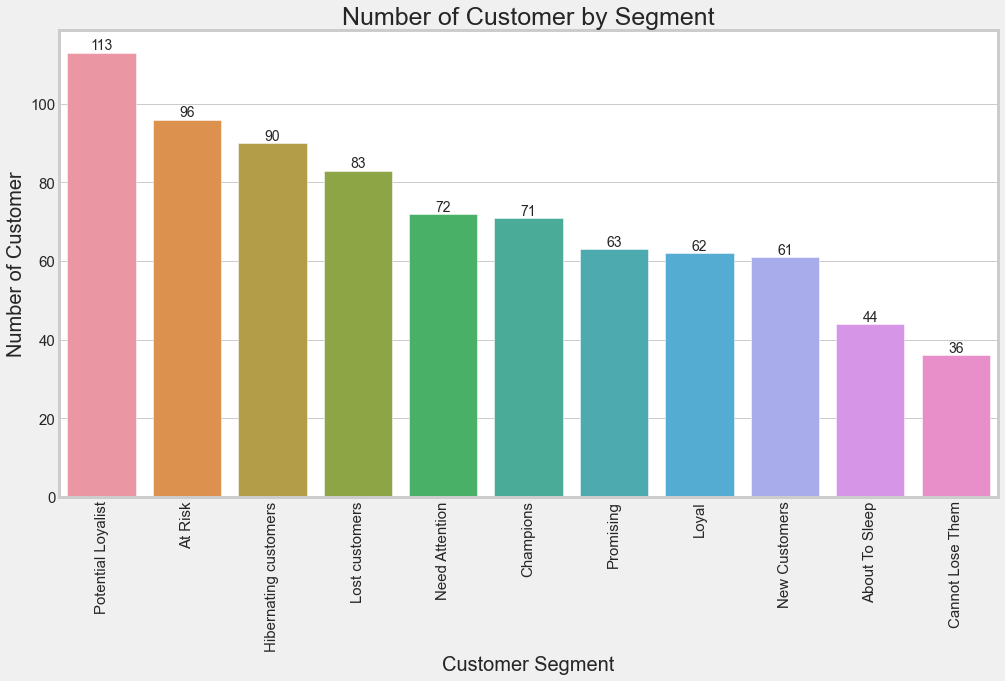

In [33]:
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
g = sns.barplot(x='segment', y='NoCustomer', data=summary_segment, order=summary_segment['segment'])
g.set_title('Number of Customer by Segment', fontsize=25)
g.set_xlabel('Customer Segment', fontdict={'size': 20})
g.set_ylabel('Number of Customer', fontdict={'size': 20})
g.bar_label(g.containers[0])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()

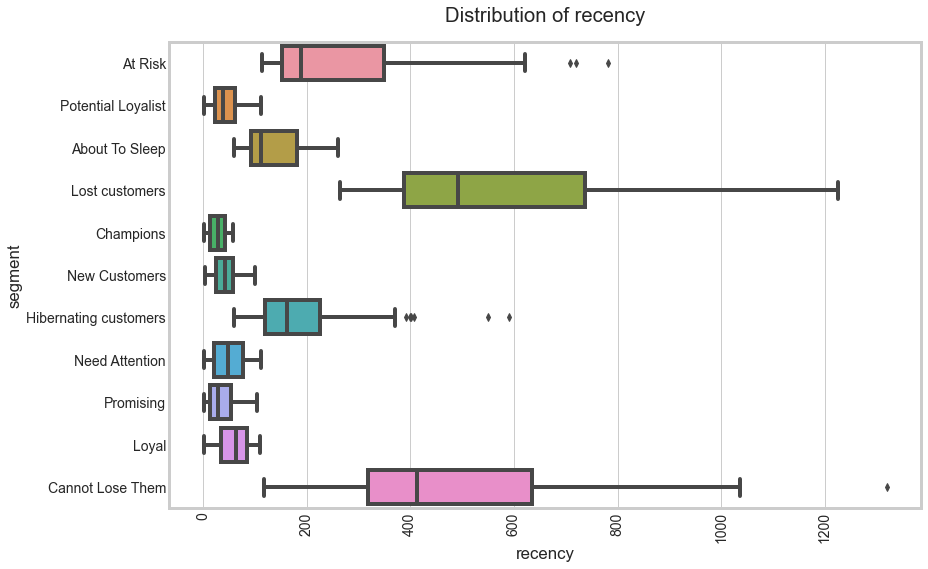

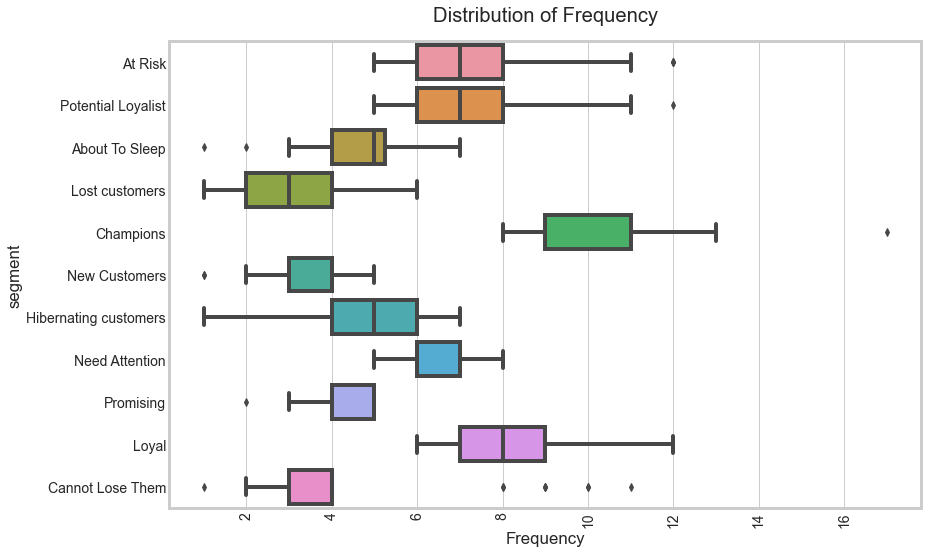

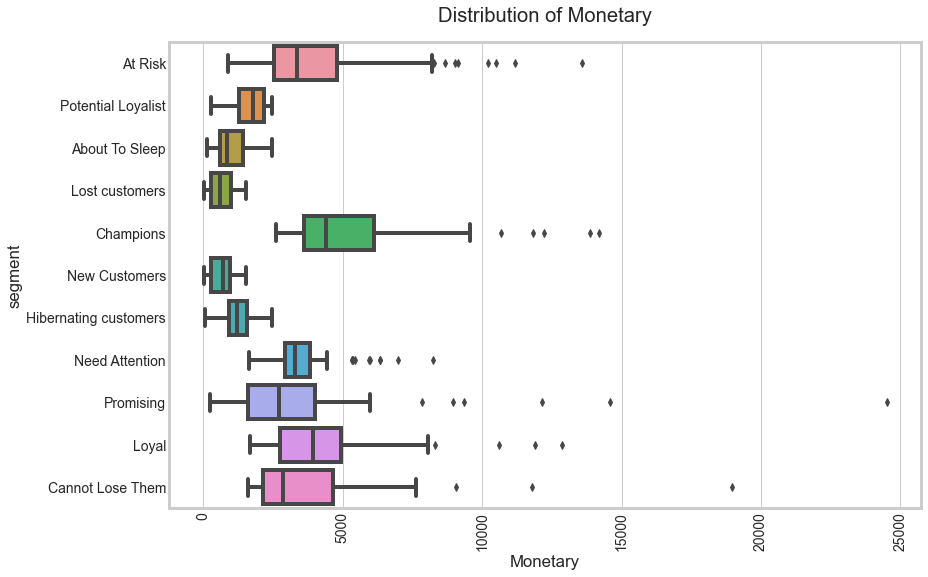

In [34]:
cols=['recency', 'Frequency', 'Monetary']
for j in cols:
    plt.figure(figsize=(12,8))
    g = sns.boxplot(x=rfm_df[j], data=rfm_df, y='segment')
    g.set_title(f"Distribution of {j}", y=1.03)
    plt.xticks(rotation=90)
    plt.show()